Markdown macros

$\newcommand{\I}{\mathrm{i}} 
\newcommand{\E}{\mathrm{e}} 
\newcommand{\D}{\mathop{}\!\mathrm{d}}
\newcommand{\bra}[1]{\langle{#1}|}
\newcommand{\ket}[1]{|{#1}\rangle}
\newcommand{\braket}[1]{\langle{#1}\rangle}
\newcommand{\bm}[1]{\boldsymbol{#1}}$

# Imports

In [1]:
# numpy https://numpy.org/
import numpy as np
# scipy https://scipy.org/
from scipy.linalg import eigvals, svd, svdvals
# scipy fortran io
from scipy.io import FortranFile
# iterators
from functools import reduce 

In [2]:
# https://networkx.org/documentation/stable/index.html
import networkx as nx

In [3]:
# matplotlib https://matplotlib.org/
import matplotlib
import matplotlib.pylab as plt

In [4]:
%matplotlib inline
from IPython.display import Image

In [5]:
# figure style
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'normal'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['figure.figsize'] = (6.0,4.5)
matplotlib.rcParams['lines.linewidth'] = 0.5
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['ytick.right'] = True
# font
matplotlib.rcParams['font.serif'] = "STIX Two Text"
matplotlib.rcParams['mathtext.fontset'] = 'stix'

In [4]:
# sympy https://www.sympy.org
import sympy as sy
from sympy.physics.quantum import TensorProduct as TP
sy.init_printing(use_unicode = True)

## Euler-Newton

Le calcul de l'accélération se fait en utilisant la formule générale
$$ \bm a = \dot{\bm \omega} \wedge \bm G + \dot{\bm \omega} \wedge (\dot{\bm \omega} \wedge \bm G) + \dot{\bm V}$$

Moment cinétique total est $\bm L = \bm L_1 + \bm L_2$:
$$\bm L_1 = I^{(1)} \bm \omega_1$$
et
$$\bm L_2 = I^{(2)} (\bm \omega_1 + R_y(\phi_1) \bm \omega_2)$$
où $I^{(1)}$ et $I^{(2)}$ sont le moments de bras 1 et 2 dans le repère fixe:
$$I^{(1)} = R_z(\phi_1) I R_z(\phi_1)^T$$
et
$$I^{(2)} = R_z(\phi) I R_z(\phi)^T$$

In [22]:
def R_z(phi):
    s = sy.sin(phi)
    c = sy.cos(phi)
    return sy.Matrix([[c, -s, 0], [s, c, 0], [0, 0, 1]])

In [16]:
e1 = sy.Matrix([1, 0, 0])
e2 = sy.Matrix([0, 1, 0])
e3 = sy.Matrix([0, 0, 1])

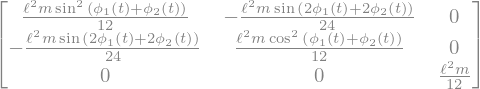

In [35]:
I_1 = sy.Matrix([[0, 0, 0],[0, m*l**2/12, 0], [0, 0, m*l**2/12]])
I_2 = I_1
I_10 = sy.simplify( R_z(f1(t))*I_1*R_z(f1(t)).T )
I_20 = sy.simplify( R_z(f1(t) + f2(t))*I_2*R_z(f1(t) + f2(t)).T )
I_20

In [59]:
# vitesse angulaire (vecteur)
w_1 = sy.diff(f1(t), t)*e3
w_2 = sy.diff(f1(t) + f2(t), t)*e3

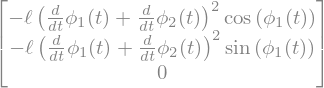

In [57]:
# accélérations
# centre de masse
A1 = sy.simplify( sy.diff(V_1, t) )
A2 = sy.simplify( sy.diff(V_2, t) )
# angulaire
dw1 = sy.diff(w_1, t)
dw2 = sy.diff(w_1, t)

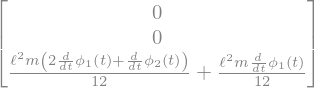

In [61]:
# moment cinétique
L_1 = I_10*w_1
L_2 = I_20*(w_1 + R_z(f1(t))*w_2)
L_1 + L_2

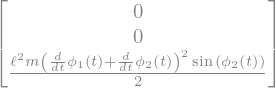

In [58]:
sy.simplify( m*G_2.cross(a2))

In [54]:
w_2.cross(I_20*w_2)